In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr = [[1,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_ferro(L,hz):
    basis = spin_basis_1d(L)
    #hz=5#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=-1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[1,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L):
    basis = spin_basis_1d(L)
    hz=5#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[1,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr=np.zeros(L)
    hx_lamb_arr[0]=hx_lamb
    hx_lamb_arr = [[hx_lamb_arr[i],i] for i in range(L)] # OBC
    static_lamb = [["z",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [3]:
def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

I should see how the ground state is looking like. It should be anti-ferromagnetic.<br /> 
<b> Update:</b> Physically, one possible way that can be seen is by computing magnetization as a function of $h_z$. However, this only works for ferromagnetic Hamiltonian, and not for anti-ferro. :( <br /> 
What is magnetization for the following Hamiltonian? <br /> 
$H = \sum \sigma_{i}^x \sigma_{i+1}^x+ h_z \sum \sigma_i^z$ <br /> 

$<m>=\sum \sigma_{i}^x / N$, where $N$ is number of spins.

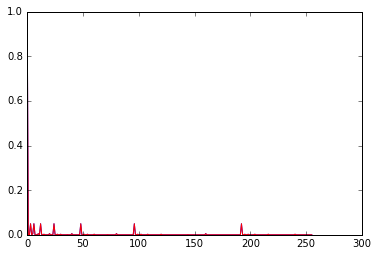

In [20]:
x=np.arange(2**L)
plt.plot(x,np.abs(V_antiferro[:,0]), 'b', label='Anti-ferro')
plt.plot(x,np.abs(V_ferro[:,0]), 'r', label='Ferro')

In [9]:
def avg_mag(V,L):
    basis = spin_basis_1d(L)  
    hx=1.0
    hx_arr = [[hx,i] for i in range(L)] # OBC
    static = [["x",hx_arr]]
    dynamic=[]
    s_x=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return np.dot(V,np.dot(s_x.toarray(),np.conj(V)))

def avg_square_mag(V,L):
    basis = spin_basis_1d(L)  
    hx=1.0
    hx_arr = [[hx,i] for i in range(L)] # OBC
    static = [["x",hx_arr]]
    dynamic=[]
    s_x=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    s_x_sq=s_x**2
    return np.dot(V,np.dot(s_x_sq.toarray(),np.conj(V)))

In [17]:
L=4
hz=10
H_ferro= Ham_int_ferro(L,hz)
E_ferro,V_ferro= H_ferro.eigh()
H_antiferro=Ham_int_antiferro(L)
E_antiferro,V_antiferro= H_ferro.eigh()
V_gs=V_ferro[:,-1]
avg_mag(V_gs,L)

(7.7418687592151633e-18+0j)

In [7]:
E_ferro,V_ferro= H_ferro.eigh()
H_antiferro=Ham_int_antiferro(L)
E_antiferro,V_antiferro= H_ferro.eigh()
V_gs=V_ferro[:,-1]
avg_mag(V_gs,L)**2

<16x16 qspin sprase hamiltonian of type 'complex128' stored in Compressed Sparse Row format>

In [47]:
L=8
hz=np.linspace(0,5,20)
avg_mag_arr=np.zeros(len(hz))
avg_square_mag_arr=np.zeros(len(hz))
for i in range(len(hz)):
    H_ferro= Ham_int_ferro(L,hz[i])
    E_ferro,V_ferro= H_ferro.eigh()
    H_antiferro=Ham_int_antiferro(L)
    E_antiferro,V_antiferro= H_ferro.eigh()
    V_gs=V_ferro[:,-1]
    avg_mag_arr[i]=np.real(avg_mag(V_gs,L))/L
    avg_square_mag_arr[i]=np.real(avg_square_mag(V_gs,L))/L**2

In [48]:
L=10
hz=np.linspace(0,5,20)
avg_mag_arr10=np.zeros(len(hz))
avg_square_mag_arr10=np.zeros(len(hz))
for i in range(len(hz)):
    H_ferro= Ham_int_ferro(L,hz[i])
    E_ferro,V_ferro= H_ferro.eigh()
    H_antiferro=Ham_int_antiferro(L)
    E_antiferro,V_antiferro= H_ferro.eigh()
    V_gs=V_ferro[:,-1]
    avg_mag_arr10[i]=np.real(avg_mag(V_gs,L))/L
    avg_square_mag_arr10[i]=np.real(avg_square_mag(V_gs,L))/L**2

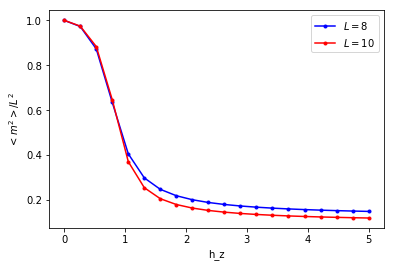

In [55]:
plt.plot(hz,avg_square_mag_arr, 'b.-', label=r"$L=8$")
plt.plot(hz,avg_square_mag_arr10, 'r.-', label=r"$L=10$")

#plt.plot(hz,avg_mag_arr, 'r', label=r"$<m/L>$")
plt.xlabel("h_z")
plt.ylabel(r"$<m^2>/L^2$")
plt.legend()

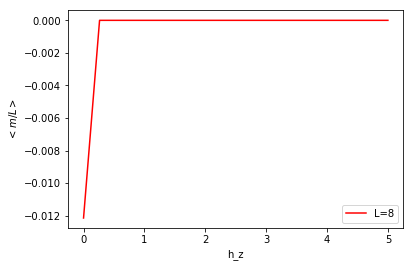

In [56]:
plt.plot(hz,avg_mag_arr, 'r', label="L=8")
plt.xlabel("h_z")
plt.ylabel(r"$<m/L>$")
plt.legend()

For groundstate of ferromagnetic Hamiltonian,magnetization $<m>$ is zero for all h/J values, while $<m^2>$ is what captures phase transitions. For anti-ferromagnetic Hamiltonian, staggered magnetization should be measured. $<m_s>= \sum_j (-1)^j \sigma_j^z$ will be zero while $<m_s^2>= \sum_{j,k}(-1)^{j+k} \sigma_j^z \sigma_k^z$ will capture phase transition. <br>
Things to think about: why <m> is zero for groundstate of both ferromagnetic Hamiltonian and anti-ferromagnetic Hamiltonian? Is it related to Ising symmetry obeyed by these Hamiltonians?